In [2]:
!pip3 install opencv-contrib-python

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import cv2 as cv
print(cv.__version__)

4.1.2


In [8]:
import os
import numpy as np

people = ["Ben Afflek", "Elton John", "Jerry Seinfield", "Madonna",
          "Mindy Kaling"]

In [10]:
haar_cas = cv.CascadeClassifier("/content/drive/MyDrive/Colab/Face Detection/haarscade.xml")
DIR = "/content/drive/MyDrive/Colab/Face Detection/Faces/train"
features = []
labels = []

In [11]:
def create_train():
  for person in people:
    PATH = os.path.join(DIR, person)
    label = people.index(person)

    for img in os.listdir(PATH):
      img_path = os.path.join(PATH, img)
      img_array = cv.imread(img_path)
      gray = cv.cvtColor(img_array, cv.COLOR_BGR2GRAY)

      faces_rect = haar_cas.detectMultiScale(gray, scaleFactor = 1.1,
                                             minNeighbors = 4)
      for (x, y, w, h) in faces_rect:
        faces_roi = gray[y:y+h, x:x+w]
        features.append(faces_roi)
        labels.append(label)

In [12]:
create_train()
print(f"Number of features: {len(features)}")
print(f"Number of label: {len(labels)}")

Number of features: 100
Number of label: 100


In [14]:
features = np.array(features, dtype = "object")
labels = np.array(labels)

face_recognizer = cv.face.LBPHFaceRecognizer_create()
face_recognizer.train(features, labels)
print("Trining is done ---------")
np.save("/content/drive/MyDrive/Colab/Face Detection/features.npy", features)
np.save("/content/drive/MyDrive/Colab/Face Detection/labels.npy", labels)

Trining is done ---------


In [15]:
face_recognizer.save("/content/drive/MyDrive/Colab/Face Detection/face_trained.yml")

In [20]:
#face_recognizer = cv.face.LBPHFaceRecognizer_create()
face_recognizer.read("/content/drive/MyDrive/Colab/Face Detection/face_trained.yml")

Label : Elton John with a confidence of 90.89414434305048


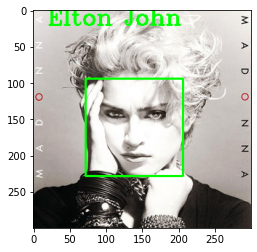

In [34]:
import matplotlib.pyplot as plt
img = cv.imread("/content/drive/MyDrive/Colab/Face Detection/Faces/val/madonna/2.jpg")
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
faces_rect = haar_cas.detectMultiScale(gray, 1.1, 4)

for (x, y, w, h) in faces_rect:
  faces_roi = gray[y:y+h, x:x+h]
  label, confidence = face_recognizer.predict(faces_roi)
  print(f"Label : {people[label]} with a confidence of {confidence}")
  cv.putText(img, str(people[label]), (20,20), cv.FONT_HERSHEY_COMPLEX,
             1.0, (0, 255, 0), 2)
  cv.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), thickness = 2)

img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()